<a href="https://colab.research.google.com/github/Hadiasemi/Data301/blob/main/Copy_of_3_6_Converting_Categorical_Variables_to_Quantitative_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.6 Converting Categorical Variables to Quantitative Variables

We have seen how quantitative variables can be converted to categorical variables using the `cut` function. What about the other way around? Can categorical variables be converted to quantitative ones?

In [54]:
import numpy as np
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")
df_titanic

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1
...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0


## Converting Categorical Variables to Quantitative Variables

Binary categorical variables (categorical variables with exactly two categories) can be converted into quantitative variables by coding one category as 1 and the other category as 0. (In fact, the **survived** column in the Titanic data set has already been coded this way.) The easiest way to do this is to create a boolean mask. For example, to convert **gender** to a quantitative variable **female**, which is 1 if the passenger was female and 0 otherwise, we can do the following:

In [55]:
df_titanic["female"] = 1 * (df_titanic["gender"] == "female")
df_titanic["female"]

0       0
1       0
2       0
3       1
4       1
       ..
2202    0
2203    0
2204    0
2205    0
2206    0
Name: female, Length: 2207, dtype: int64

Multiplying by 1 converts the `Series` of booleans to a `Series` of integers.

Now we can manipulate this new variable as we would any other quantitative variable. For example, the sum would tell us how many passengers were female, while the mean would tell us the _proportion_ of passengers who were female.

In [56]:
df_titanic["female"].sum(), df_titanic["female"].mean()

(489, 0.2215677390122338)

What do we do about a categorical variable with more than two categories, like `embarked`, which has four categories? In general, a categorical variable with $K$ categories can be converted into $K$ separate 0/1 variables, or **dummy variables**. Each of the $K$ dummy variables is an indicator for one of the $K$ categories. That is, a dummy variable is 1 if the observation fell into its particular category and 0 otherwise.

Although it is not difficult to create dummy variables manually, the easiest way to create them is the `get_dummies()` function in `pandas`.

In [57]:
pd.get_dummies(df_titanic["embarked"])

,B,C,Q,S
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
2202,1,0,0,0
2203,0,0,0,1
2204,0,0,0,1
2205,0,0,0,1


Since every observation is in exactly one category, each row contains exactly one 1; the rest of the values in each row are 0s.

We can call `get_dummies` on a `DataFrame` to encode multiple categorical variables at once. `pandas` will only dummy-encode the variables it deems as categorical, leaving the quantitative variables alone. If there are any categorical variables that are represented in the `DataFrame` using numeric types, they must be cast explicitly to a categorical type, such as `str`.  `pandas` will also automatically prepend the variable name to all dummy variables, to prevent collisions between column names in the final `DataFrame`.

In [58]:
# Pass all variables to get_dummies, dropping ones that are "other" types
df_titanic_quant = pd.get_dummies(
    df_titanic.drop(["name", "ticketno"], axis=1)
)
df_titanic_quant

,age,fare,survived,female,gender_female,gender_male,class_1st,class_2nd,class_3rd,class_deck crew,...,country_South Africa,country_Spain,country_Sweden,country_Switzerland,country_Syria,country_Turkey,country_United States,country_Uruguay,country_Wales,country_Yugoslavia
0,42.0,7.11,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,13.0,20.05,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,16.0,20.05,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,39.0,20.05,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,16.0,7.13,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,41.0,NaN,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2203,40.0,NaN,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2204,32.0,NaN,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2205,20.0,NaN,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Notice that categorical variables, like `class`, were converted to dummy variables with names like `class_1st`, `class_2nd` and `class_3rd`, while quantitative variables, like `age`, were left alone.

# Exercises

Exercises 1-3 ask you to work with the Ames housing data set (`https://dlsun.github.io/pods/data/AmesHousing.txt`).

In [59]:
df_ames = pd.read_csv("https://dlsun.github.io/pods/data/AmesHousing.txt", sep="\t")
df_ames.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [60]:
df_ames['Neighborhood'].describe()

count      2930
unique       28
top       NAmes
freq        443
Name: Neighborhood, dtype: object

1\. The **Neighborhood** variable in this data set is categorical. Convert it into $K$ quantitative variables. What is $K$ in this case? Each neighborhood

How would you use the quantitative variables that you just created to calculate the distribution of houses across the neighborhoods?

In [61]:
houses =pd.get_dummies(df_ames['Neighborhood']).sum()

2\. How would you use the quantitative variables that you just created, along with the **SalePrice** column, to calculate the average price of a home in each neighborhood?

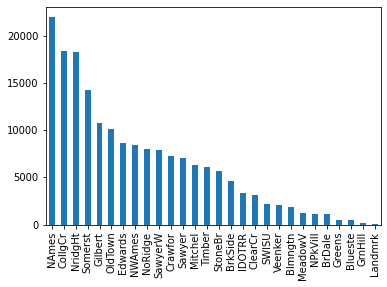

In [62]:
pd.get_dummies(df_ames['Neighborhood']).multiply(df_ames['SalePrice'], axis=0).mean()
pd.get_dummies(df_ames['Neighborhood']).multiply(df_ames['SalePrice'], axis=0).mean().sort_values(ascending=False).plot.bar()

In [63]:
pd.get_dummies(df_ames['Neighborhood']).multiply(df_ames['SalePrice'], axis=0).sum(axis = 0).divide(houses.sum(axis=0))

Blmngtn     1879.360751
Blueste      490.068259
BrDale      1081.313993
BrkSide     4598.523891
ClearCr     3133.492150
CollgCr    18389.596246
Crawfor     7296.155631
Edwards     8663.350171
Gilbert    10736.069966
Greens       528.412969
GrnHill      191.126280
IDOTRR      3293.180887
Landmrk       46.757679
MeadowV     1209.211604
Mitchel     6311.889420
NAmes      21937.926962
NPkVill     1104.556314
NWAmes      8423.653584
NoRidge     8004.320137
NridgHt    18244.038225
OldTown    10114.014334
SWISU       2212.782594
Sawyer      7047.584983
SawyerW     7852.823549
Somerst    14268.509556
StoneBr     5643.579863
Timber      6059.783959
Veenker     2033.976109
dtype: float64

3\. Suppose you convert the **Neighborhood** and **Bldg Type** variables to quantitative variables. How many new quantitative variables will you have? What is the value of the sum across each row of these new quantitative variables?

In [66]:
pd.get_dummies(df_ames[['Neighborhood', "Bldg Type"]])

,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE
count,2930.000000,2930.000000,2930.000000,2930.00000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,0.009556,0.003413,0.010239,0.03686,0.015017,0.091126,0.035154,0.066212,0.056314,0.002730,...,0.042662,0.062116,0.017406,0.024573,0.008191,0.827645,0.021160,0.037201,0.034471,0.079522
std,0.097305,0.058331,0.100685,0.18845,0.121641,0.287838,0.184199,0.248694,0.230566,0.052191,...,0.202129,0.241407,0.130801,0.154847,0.090149,0.377753,0.143943,0.189287,0.182467,0.270598
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
df_ames['Neighborhood'].describe()

count      2930
unique       28
top       NAmes
freq        443
Name: Neighborhood, dtype: object

In [69]:
df_ames['Bldg Type'].describe()

count     2930
unique       5
top       1Fam
freq      2425
Name: Bldg Type, dtype: object

In [70]:
pd.get_dummies(df_ames[['Neighborhood', "Bldg Type"]]).sum(axis=0)

Neighborhood_Blmngtn      28
Neighborhood_Blueste      10
Neighborhood_BrDale       30
Neighborhood_BrkSide     108
Neighborhood_ClearCr      44
Neighborhood_CollgCr     267
Neighborhood_Crawfor     103
Neighborhood_Edwards     194
Neighborhood_Gilbert     165
Neighborhood_Greens        8
Neighborhood_GrnHill       2
Neighborhood_IDOTRR       93
Neighborhood_Landmrk       1
Neighborhood_MeadowV      37
Neighborhood_Mitchel     114
Neighborhood_NAmes       443
Neighborhood_NPkVill      23
Neighborhood_NWAmes      131
Neighborhood_NoRidge      71
Neighborhood_NridgHt     166
Neighborhood_OldTown     239
Neighborhood_SWISU        48
Neighborhood_Sawyer      151
Neighborhood_SawyerW     125
Neighborhood_Somerst     182
Neighborhood_StoneBr      51
Neighborhood_Timber       72
Neighborhood_Veenker      24
Bldg Type_1Fam          2425
Bldg Type_2fmCon          62
Bldg Type_Duplex         109
Bldg Type_Twnhs          101
Bldg Type_TwnhsE         233
dtype: int64